In [79]:
### need to have all of these installed

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import statistics as stat

In [80]:
### TODO: Determine what data is needed for our model

"""
if you need a certain value from the DataFrame use this notation
    print(dataset_train.iloc[1].get("Unix Timestamp"))
"""

"""
To convert from these unix time stamps you need to convert to float then divide by 1000
    timestampEx = dataset_train.iloc[0].get("Unix Timestamp")
    timestampEx = np.float64(timestampEx).item() / 1000
    print(datetime.utcfromtimestamp(timestampEx).strftime("%D %H:%M"))
"""
dataset_train = pd.read_csv("data\Eth_1H_MAR7_APR7.csv")

time_set = dataset_train.iloc[:, 0].values
open_set = dataset_train.iloc[:, 3].values
close_set = dataset_train.iloc[:, 6].values
high_set = dataset_train.iloc[:, 4].values
low_set = dataset_train.iloc[:, 5].values
volumn_set = dataset_train.iloc[:, 7].values

openZeroCount,closeZeroCount, highZeroCount, lowZeroCount, volumnZeroCount = 0, 0, 0, 0, 0

### this means we aren't missing any records
print(len(open_set) == len(close_set) == len(high_set) == len(low_set) == len(volumn_set))

for i in range(len(open_set)):
    if(open_set[i] == 0):
        openZeroCount += 1 

    if(close_set[i] == 0):
        closeZeroCount += 1

    if(high_set[i] == 0):
        highZeroCount += 1

    if(low_set[i] == 0):
        lowZeroCount += 1
    
    if(volumn_set[i] == 0):
        volumnZeroCount += 1

stDevLow = stat.stdev(low_set)
stDevHigh = stat.stdev(high_set)
stDevOpen = stat.stdev(open_set)
stDevClose = stat.stdev(close_set)
stDevVolumn = stat.stdev(volumn_set)
print(f"stdev for low: {stDevLow}")
print(f"stdev for high: {stDevHigh}")
print(f"stdev for open: {stDevOpen}")
print(f"stdev for close: {stDevClose}")
print(f"stdev for volumn: {stDevVolumn}")

### taking this into account I don't think we can use volumn 
### we should replace these with the median value
### upon inspection, the record that contains the 0 values is the last one
### maybe we should just toss it out
print(f"number of open entries that are 0: {openZeroCount}")
print(f"number of close entries that are 0: {closeZeroCount}")
print(f"number of high entries that are 0: {highZeroCount}")
print(f"number of low entries that are 0: {lowZeroCount}")
print(f"number of volumn entries that are 0: {volumnZeroCount}")



True
stdev for low: 234.53257266811556
stdev for high: 239.46852661620176
stdev for open: 237.2054551051874
stdev for close: 237.2025640950822
stdev for volumn: 7003.560099198604
number of open entries that are 0: 0
number of close entries that are 0: 0
number of high entries that are 0: 0
number of low entries that are 0: 0
number of volumn entries that are 0: 2442


34496


ValueError: x and y must be the same size

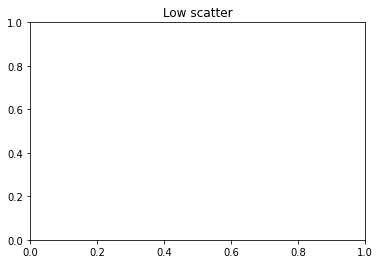

In [81]:
### ploting the data to determine if there is much noise
### This data appears almost noiseless
list = low_set.tolist()
list.reverse()
plt.title("Low scatter")
print(len(list))
plt.scatter(range(34496), list, color="blue")
plt.show()

list = high_set.tolist()
list.reverse()
plt.title("high scatter")
plt.scatter(range(34496), list, color="red")
plt.show()

list = open_set.tolist()
list.reverse()
plt.title("open scatter")
plt.scatter(range(34496), list, color="green")
plt.show()

list = close_set.tolist()
list.reverse()
plt.title("open scatter")
plt.scatter(range(34496), list, color="purple")
plt.show()